<ipython-input-49-1906fdbdf9e2>:22: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


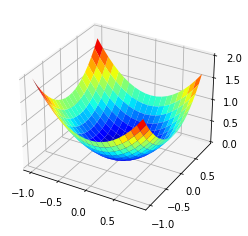

In [49]:
from numpy import arange
from numpy import meshgrid
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

# objective function
def objective(x, y):
	return x**2.0 + y**2.0
 
# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

In [78]:
def derivative(x,y):
    return 2*x, 2*y

xi = [1.5, 1.7]

alpha = 0.01
iteration = 200
target_error = 0.000001

xg_log = np.zeros(200)
xm_log = np.zeros(200)
xa_log = np.zeros(200)

for i in range(iteration):
    xi_current = xi
    der_xi = derivative(xi[0], xi[1])
    xi[0] = xi[0] - alpha*der_xi[0]
    xi[1] = xi[1] - alpha*der_xi[1]
    xg_log[i] = objective(xi[0], xi[1])
print(xi)
print(objective(xi[0], xi[1]))    

[0.026381919908582345, 0.029899509229726687]
0.0015899863502413648


In [79]:
def derivative(x,y):
    return 2*x, 2*y

xi = [1.5, 1.7]

alpha = 0.01
iteration = 200
target_error = 0.000001
miu = 0.01
der_xi_old = [0.0, 0.0]
mi = [0.0, 0.0]

for i in range(iteration):
    xi_current = xi
    der_xi = derivative(xi[0], xi[1])
    mi[0] = miu*alpha*der_xi_old[0]
    mi[1] = miu*alpha*der_xi_old[1]
    xi[0] = xi[0] - alpha*der_xi[0] + mi[0]
    xi[1] = xi[1] - alpha*der_xi[1] + mi[1]
    der_xi_old = der_xi
    xm_log[i] = objective(xi[0], xi[1])
print(xi)
print(objective(xi[0], xi[1]))  

[0.02749783004726912, 0.03116420738690502]
0.001727338479362522


In [80]:
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
 
# objective function
def objective(x, y):
	return x**2.0 + y**2.0
 
# derivative of objective function
def derivative(x, y):
	return asarray([x * 2.0, y * 2.0])
 
# gradient descent algorithm with adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
	# generate an initial point
	x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	score = objective(x[0], x[1])
	# initialize first and second moments
	m = [0.0 for _ in range(bounds.shape[0])]
	v = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent updates
	for t in range(n_iter):
		# calculate gradient g(t)
		g = derivative(x[0], x[1])
		# build a solution one variable at a time
		for i in range(x.shape[0]):
			# m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
			m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
			# v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
			v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
			# mhat(t) = m(t) / (1 - beta1(t))
			mhat = m[i] / (1.0 - beta1**(t+1))
			# vhat(t) = v(t) / (1 - beta2(t))
			vhat = v[i] / (1.0 - beta2**(t+1))
			# x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
			x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
		# evaluate candidate point
		score = objective(x[0], x[1])
		# report progress
		print('>%d f(%s) = %.5f' % (t, x, score))
		xa_log[t] = score
	return [x, score]
   
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-2.0, 2.0], [-2.0, 2.0]])
# define the total iterations
n_iter = 200
# steps size
alpha = 0.01
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
best, score = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.32191198  0.87129797]) = 0.86279
>1 f([-0.31193007  0.86130445]) = 0.83915
>2 f([-0.30197884  0.85132174]) = 0.81594
>3 f([-0.29207118  0.84135415]) = 0.79318
>4 f([-0.28222008  0.83140591]) = 0.77088
>5 f([-0.27243855  0.82148114]) = 0.74905
>6 f([-0.26273948  0.8115838 ]) = 0.72770
>7 f([-0.25313556  0.80171769]) = 0.70683
>8 f([-0.24363911  0.7918864 ]) = 0.68644
>9 f([-0.23426208  0.78209332]) = 0.66655
>10 f([-0.22501587  0.7723416 ]) = 0.64714
>11 f([-0.21591138  0.76263418]) = 0.62823
>12 f([-0.20695885  0.75297376]) = 0.60980
>13 f([-0.19816789  0.74336282]) = 0.59186
>14 f([-0.18954744  0.73380361]) = 0.57440
>15 f([-0.18110574  0.72429821]) = 0.55741
>16 f([-0.17285031  0.71484846]) = 0.54089
>17 f([-0.164788    0.70545604]) = 0.52482
>18 f([-0.15692491  0.69612247]) = 0.50921
>19 f([-0.14926648  0.68684911]) = 0.49404
>20 f([-0.14181745  0.67763717]) = 0.47930
>21 f([-0.13458187  0.66848775]) = 0.46499
>22 f([-0.12756316  0.65940184]) = 0.45108
>23 f([-0.12076406  0

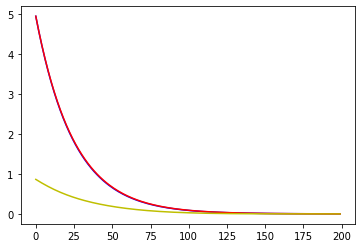

In [81]:
step = np.arange(0,200,1)
plt.figure()
plt.plot(step, xg_log, '-b', step, xm_log, '-r', step, xa_log, '-y')